In [ ]:
!cp /content/drive/MyDrive/data/cd4_91K_random_walk.fa /content
!cp /content/drive/MyDrive/data/cd4_act_91K_random_walk.txt /content

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#x=[-0.16258668,-0.67031389,-0.95582507,0.02208747,1.,0.71448883,0.20676161,0.04417493]
def gaus_wave(order=1,sigma=1,points=10,upper_bound=4,lower_bound=-4,plot=False):

  # No error checking for number of points that can be given or the bounds limits and range
  # points: the number of points used to represent the function's x-axis. 
  x=np.linspace(lower_bound,upper_bound,points)
  gaussian_base=np.exp(-(np.multiply(x,x)/(2*sigma**2)))
  gaus=np.zeros_like(x)

  if order==0:
    gaus=np.multiply(1/(sigma*np.sqrt(2*np.pi)),gaussian_base)
  elif order==1:
    gaus=np.multiply(np.divide(-x,sigma**2*np.sqrt(2*np.pi)),gaussian_base)
  elif order==2:
    gaus=np.divide(-gaussian_base,(sigma**3*np.sqrt(2*np.pi))) + np.multiply(np.multiply(x,x),gaussian_base)/(sigma**5*np.sqrt(2*np.pi))

  if plot:
    plt.plot(gaus)
    plt.show()
  
  return gaus

In [ ]:
import pickle
pickle.dump()

In [ ]:
!pip install PyWavelets

In [ ]:
import pywt
wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [ ]:
wav = pywt.ContinuousWavelet('gaus2')
wav.lower_bound,wav.upper_bound

(-5.0, 5.0)

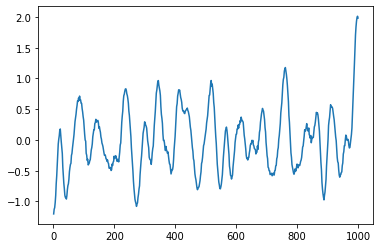

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
data=np.random.randint(2,size=600)
coef, freqs=pywt.cwt(data,10,'gaus1')
#plt.matshow(coef) # doctest: +SKIP

plt.plot(np.linspace(1,1000,600),coef.flatten())
plt.show() # doctest: +SKIP
#coef.shape,np.linspace(1,100,600).shape

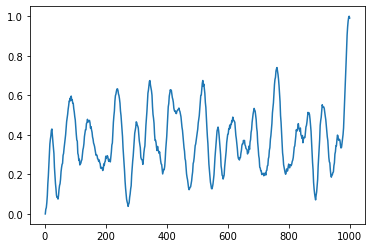

In [ ]:
import sklearn.preprocessing

coef=sklearn.preprocessing.minmax_scale(coef, feature_range=(0, 1), axis=1, copy=True)
plt.plot(np.linspace(1,1000,600),coef.flatten())
plt.show()

10


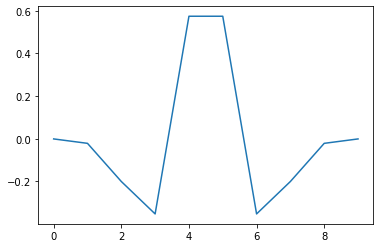

In [ ]:
from scipy import signal

import matplotlib.pyplot as plt
points = 10
a = 1.0
vec2 = signal.ricker(points, a)
print(len(vec2))
plt.plot(vec2)
plt.show()

Continuous wavelet will be evaluated over the range [-5.0, 5.0]


Text(0.5, 1.0, '|FFT(filter)|$^2$')

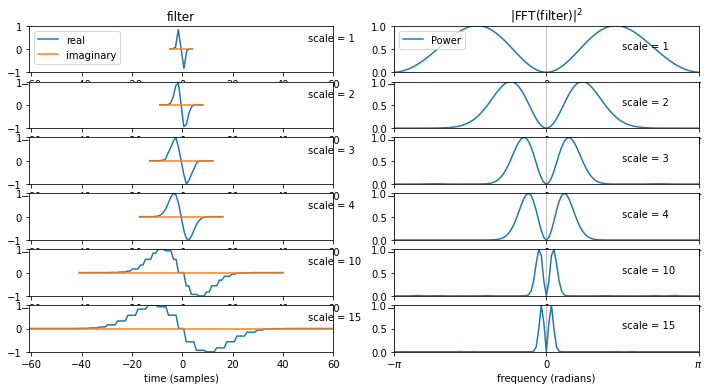

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

wav = pywt.ContinuousWavelet('gaus2')

# print the range over which the wavelet will be evaluated
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

#width = wav.upper_bound - wav.lower_bound
width=8
wav.upper_bound =4
wav.lower_bound=-4
scales = [1, 2, 3, 4, 10, 15]

filters=[]
max_len = int(np.max(scales)*width + 1)
t = np.arange(max_len)
fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
for n, scale in enumerate(scales):

    # The following code is adapted from the internals of cwt
    int_psi, x = pywt.integrate_wavelet(wav, precision=5)
    step = x[1] - x[0]
    j = np.floor(
        np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(np.int_)

    # normalize int_psi for easier plotting
    int_psi /= 1*np.abs(int_psi).max()
    filters.append(int_psi)

    # discrete samples of the integrated wavelet
    filt = int_psi[j][::-1]

    # The CWT consists of convolution of filt with the signal at this scale
    # Here we plot this discrete convolution kernel at each scale.

    nt = len(filt)
    t = np.linspace(-nt//2, nt//2, nt)
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len//2, max_len//2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))

    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
    axes[n, 1].plot(f, np.abs(filt_fft)**2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].grid(True, axis='x')
    axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))

axes[n, 0].set_xlabel('time (samples)')
axes[n, 1].set_xlabel('frequency (radians)')
axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')
axes[0, 0].set_title('filter')
axes[0, 1].set_title(r'|FFT(filter)|$^2$')

In [ ]:
filters=np.vstack(filters)
filters.shape

(6, 8)

In [ ]:
filters[0]

array([-0.16258668, -0.67031389, -0.95582507,  0.02208747,  1.        ,
        0.71448883,  0.20676161,  0.04417493])

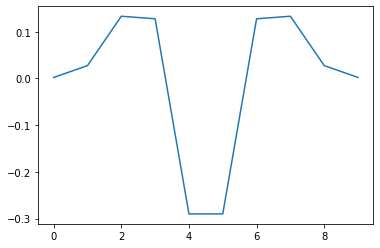

In [ ]:
g2=gaus_wave(order=2,points=10,plot=True)

In [ ]:
np.convolve([1,1,2,3,4,5],[1,-1,-.5],'valid')

array([ 0.5,  0.5,  0. , -0.5])

In [ ]:
within_2=[]
for i in range(1,598//2):
  temp=np.remainder(598,i)
  if temp<=2:
    within_2.append(i)

In [ ]:
within_3

[1, 2, 3, 4, 5, 7, 13, 17, 23, 26, 35, 46, 85, 119, 149, 199, 298]

In [ ]:
within_2

[1, 2, 3, 4, 13, 23, 26, 46, 149, 199, 298]

In [ ]:
g2

array([ 0.00200745,  0.0273911 ,  0.13300981,  0.12756339, -0.29003147,
       -0.29003147,  0.12756339,  0.13300981,  0.0273911 ,  0.00200745])